# Classification

## Team Name
>### Sigma  

## Team Member
>### 조현윤, 이상협, 정하연  

## Objective
> ### in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
> ### to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
> ### to predict the potential business value of a person who has performed a specific activity.

## Evaluation
> ### valuated on area under the ROC curve between the predicted and the observed outcome.

## Submission File
> ### For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1.
~~~~
activity_id,outcome
act1_1,0
act1_100006,0
act1_100050,0
~~~~

## Reference 
[kaggel Predicting Red Hat Business Value](https://www.kaggle.com/c/predicting-red-hat-business-value)

## Load Data Set

In [73]:
import pandas as pd
# activity data set
act_Train = pd.read_csv('./data/act_train.csv')
act_Test = pd.read_csv('./data/act_test.csv')
# people data set
people = pd.read_csv('./data/people.csv')

## Data
> #### uses two separate data files that may be joined together to create a single, unified data table.
> #### a people file and an activity file.

In [74]:
pd.set_option('display.max_columns', 60)

### People file
> #### all of the unique people (and the corresponding characteristics) that have performed activities over time.
> #### Each row in the people file represents a unique person.
> #### Each person has a unique people_id.

In [75]:
for column in people.columns:
    print ('featue : {}, type : {}'.format(column,people[column].dtype))

featue : people_id, type : object
featue : char_1, type : object
featue : group_1, type : object
featue : char_2, type : object
featue : date, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : bool
featue : char_11, type : bool
featue : char_12, type : bool
featue : char_13, type : bool
featue : char_14, type : bool
featue : char_15, type : bool
featue : char_16, type : bool
featue : char_17, type : bool
featue : char_18, type : bool
featue : char_19, type : bool
featue : char_20, type : bool
featue : char_21, type : bool
featue : char_22, type : bool
featue : char_23, type : bool
featue : char_24, type : bool
featue : char_25, type : bool
featue : char_26, type : bool
featue : char_27, type : bool
featue : char_28, type : bool
featue : char_29, type : bool
featue : char_30, type : b

people_id : identical  
group_1 : group *  
date : datetime  
char_1 ~ char_9 : type *  
char_10 ~ char_37 : True or False  
char_38 : integer  

In [76]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [77]:
len(people)

189118

### activity file

> #### the unique activities (and the corresponding activity characteristics) that each person has performed over time.
> #### Each row in the activity file represents a unique activity performed by a person on a certain date.
> #### Each activity has a unique activity_id.
> #### The activity file contains several different categories of activities.    
>> ##### Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
> ####  All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

### act_Train

In [78]:
for column in act_Train.columns:
    print ('featue : {}, type : {}'.format(column,act_Train[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object
featue : outcome, type : int64


In [79]:
act_Train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


### act_Test

In [80]:
for column in act_Test.columns:
    print ('featue : {}, type : {}'.format(column,act_Test[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object


In [81]:
act_Test.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


> #### To develop a predictive model with this data, you will likely need to join the files together into a single data set.
> #### The two files can be joined together using person_id as the common key.

### Load Python Package

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from datetime import date
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
import scipy as sp
%matplotlib inline

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import xgboost
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

In [85]:
# import numpy as np
def ResetDataFrame(df, checkList):
    for feature in df.columns:
        if feature not in checkList:
            if df[feature].dtype == 'object':
                df[feature].fillna ('type 0', inplace = True)
                df[feature] = df[feature].apply(lambda x:x.split(' ')[1]).astype(np.int32)
            elif df[feature].dtype == 'bool':
                df[feature] = df[feature].astype(np.int8)
    return df

In [86]:
def SetTime(df, timeFeature):
    df[timeFeature] = pd.to_datetime(df[timeFeature])
    df['year'] = df[timeFeature].dt.year
    df['month'] = df[timeFeature].dt.month
    df['day'] = df[timeFeature].dt.day
    df['weekday'] = df[timeFeature].dt.weekday
    df['weekend'] = ((df.weekday == 0) | (df.weekday == 6)).astype(int)
    return df

## Exploratory Data Analysis (EDA )¶

#### people id in act_train data set

In [87]:
len(act_Train)

2197291

In [88]:
print('Number of active people: {}'.format(act_Train['people_id'].nunique()))

Number of active people: 151295


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


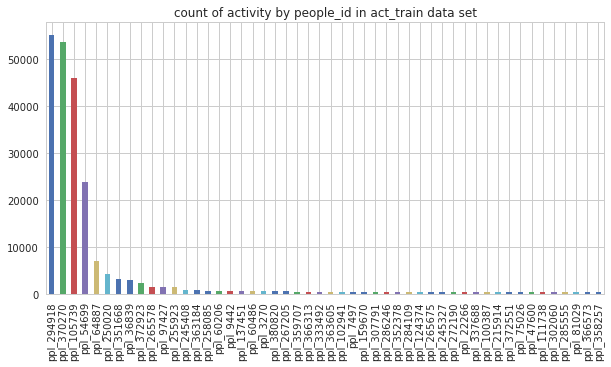

In [89]:
plt.figure(figsize=(10,5))
act_Train['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_train data set')

#### people id in act_test data set

In [90]:
len(act_Test)

498687

In [91]:
print('Number of active people: {}'.format(act_Test['people_id'].nunique()))

Number of active people: 37823


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


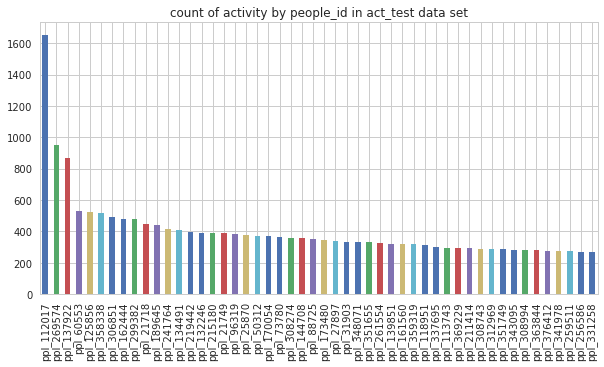

In [92]:
plt.figure(figsize=(10,5))
act_Test['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_test data set')

### Split people data set wether train data set or test data set

In [93]:
idx_train =list(act_Train['people_id'].value_counts().index)
idx_test =list(act_Test['people_id'].value_counts().index)

In [94]:
train_people = people.loc[people['people_id'].isin(idx_train)]
test_people = people.loc[people['people_id'].isin(idx_test)]

In [95]:
train_people.to_csv('./data/act_train_people.csv',index=False)
test_people.to_csv('./data/act_test_people.csv',index=False)

### group by people_id & outcome in people data set

In [96]:
dfx = act_Train.groupby(['people_id','outcome']).size().unstack()
dfx = dfx.fillna(0).astype(int)

In [97]:
only_1 = dfx[(dfx[0]==0) & (dfx[1]!=0)]
only_0 = dfx[(dfx[0]!=0) & (dfx[1]==0)]
mix__0or1 = dfx[(dfx[0]!=0) & (dfx[1]!=0)]
totalCount = len(only_1.index) + len(only_0.index) + len(mix__0or1)

In [98]:
only1 = len(only_1.index)/totalCount
only0 = len(only_0.index)/totalCount
mix = len(mix__0or1)/totalCount

In [99]:
print ('only 1 : {0}, people probability : {1:0.4f}'.format(len(only_1.index), only1))
print ('only 0 : {0} , people probability : {1:0.4f}'.format(len(only_0.index), only0))
print ('0 or 1 : {0}, , people probability : {1:0.4f}'.format(len(mix__0or1), mix))

only 1 : 62115, people probability : 0.4106
only 0 : 82524 , people probability : 0.5455
0 or 1 : 6656, , people probability : 0.0440


### people_id & outcome in act_train data set

In [100]:
train_people = pd.merge(train_people, dfx, left_on = 'people_id',right_index = True)

In [101]:
train_people.rename(columns={0:'outcome_0',1:'outcome_1'}, inplace = True)

In [102]:
def ax(x):
    if x['outcome_0'] !=0 and x['outcome_1'] ==0:
        return 0
    elif x['outcome_0'] ==0 and x['outcome_1'] !=0:
        return 1
    else:
        return 2

In [103]:
train_people['result'] = train_people.apply(ax, axis = 1)

In [104]:
x = train_people[['people_id','outcome_0','outcome_1']]
x.set_index('people_id', inplace = True)
x = x.loc[idx_train]

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


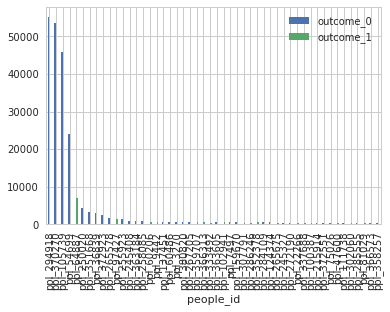

In [105]:
plt.figure(figsize=(15,5))
x[:50].plot(kind = 'bar')

In [106]:
train_people.drop(['outcome_0','outcome_1'],inplace = True, axis = 1)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


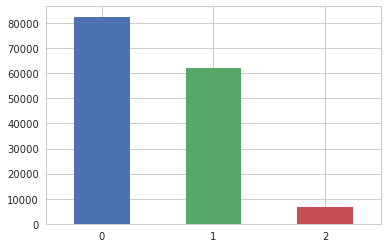

In [107]:
train_people['result'].value_counts().plot(kind = 'bar',rot = 0)

In [108]:
only1_in_act = len(act_Train.loc[act_Train['people_id'].isin(only_1.index)])
only0_in_act = len(act_Train.loc[act_Train['people_id'].isin(only_0.index)])
mix_in_act = len(act_Train.loc[act_Train['people_id'].isin(mix__0or1.index)])
print ('{} {} {}'.format(only1_in_act, only0_in_act, mix_in_act))

819757 1069456 308078


In [109]:
x0 = pd.concat([act_Train.loc[act_Train['people_id'].isin(only_1.index)],act_Train.loc[act_Train['people_id'].isin(only_0.index)]])

In [169]:
x0.head()

,people_id,activity_id,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome,year,month,day,weekday,weekend
6,ppl_100002,act2_1233489,2,0,0,0,0,0,0,0,0,0,1,1,2022,11,23,2,0
7,ppl_100002,act2_1623405,2,0,0,0,0,0,0,0,0,0,1,1,2022,11,23,2,0
8,ppl_100003,act2_1111598,2,0,0,0,0,0,0,0,0,0,1,1,2023,2,7,1,0
9,ppl_100003,act2_1177453,2,0,0,0,0,0,0,0,0,0,1,1,2023,6,28,2,0
10,ppl_100003,act2_133509,4,0,0,0,0,0,0,0,0,0,894,1,2022,8,10,2,0


In [110]:
list1 = ['people_id','activity_id','date', 'outcome']
x0 = ResetDataFrame(x0, list1)
x0 = SetTime(x0,'date')
x0.drop('date',axis = 1,inplace = True)

In [174]:
x_test0 = act_Test.drop(['people_id','activity_id'],axis = 1)

In [111]:
x1 = act_Train.loc[act_Train['people_id'].isin(mix__0or1.index)]

In [112]:
list1 = ['people_id','activity_id','date', 'outcome']
x1 = ResetDataFrame(x1, list1)
x1 = SetTime(x1,'date')
x1.drop('date',axis = 1,inplace = True)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [113]:
mX = x0.drop(['people_id','activity_id','outcome'],axis = 1)
my = x0['outcome']
mtX = x1.drop(['people_id','activity_id','outcome'],axis = 1)
mty = x1['outcome']

#### Logisitic regression

In [114]:
lomodel = LogisticRegression(random_state=5).fit(mX, my)

In [115]:
cross_val_score(lomodel, mtX, mty, scoring="accuracy", cv=10)

array([ 0.50892625,  0.51574266,  0.51028954,  0.51457414,  0.51996235,
        0.86951441,  0.87620099,  0.86720982,  0.51050086,  0.51793424])

#### Gradient Boost

In [116]:
original_params0 = {'n_estimators': 15, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 10000}
original_params0.update({'learning_rate': 0.1, 'subsample': 0.5})

In [117]:
model_grad = GradientBoostingClassifier(**original_params0)
model_grad.fit(mX, my)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10000,
              min_weight_fraction_leaf=0.0, n_estimators=15,
              presort='auto', random_state=2, subsample=0.5, verbose=0,
              warm_start=False)

In [118]:
cross_val_score(model_grad, mtX, mty, scoring="accuracy", cv=10)

array([ 0.50704363,  0.50344066,  0.50399247,  0.50623215,  0.53898338,
        0.98850948,  0.96617762,  0.97591535,  0.73372935,  0.50563184])

In [166]:
grad_fi0 = sorted(zip(mX.columns,model_grad.feature_importances_),key=lambda x: x[1])[-10:]

#### Random Forest

In [119]:
original_params1 = {'n_estimators': 30, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 10000}

In [120]:
rfmodel = RandomForestClassifier(**original_params1)
rfmodel.fit(mX,my)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10000,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [121]:
cross_val_score(rfmodel, mtX, mty, scoring="accuracy", cv=10)

array([ 0.50619969,  0.50766035,  0.50717346,  0.50616723,  0.53622436,
        0.99120358,  0.98951571,  0.99315113,  0.73265816,  0.50537216])

In [167]:
rf_fi0 = sorted(zip(x_test.columns,rfmodel.feature_importances_),key=lambda x: x[1])[-10:]

### Feature importance

In [168]:
for idx in range(10):
    print ('gradient boost : {0}, {1:0.4f}, randomforest : {2}, {3:0.4f}'.format(grad_fi0[idx][0],float(grad_fi0[idx][1]), rf_fi0[idx][0],float(rf_fi0[idx][1])))

gradient boost : char_5, 0.0080, randomforest : char_4_x, 0.0056
gradient boost : char_4, 0.0086, randomforest : char_1_x, 0.0063
gradient boost : char_2, 0.0091, randomforest : char_5_x, 0.0084
gradient boost : char_1, 0.0103, randomforest : weekend_x, 0.0157
gradient boost : weekday, 0.0170, randomforest : year_x, 0.0532
gradient boost : weekend, 0.0174, randomforest : weekday_x, 0.0545
gradient boost : activity_category, 0.0371, randomforest : day_x, 0.1142
gradient boost : month, 0.0599, randomforest : month_x, 0.1229
gradient boost : day, 0.0842, randomforest : activity_category, 0.2096
gradient boost : char_10, 0.7231, randomforest : char_10_x, 0.3858


In [181]:
ypred = model_grad.predict(x_test0)
output = pd.DataFrame({ 'activity_id' : act_Test['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('sub_test0.csv', index = False)

In [182]:
ypred = rfmodel.predict(x_test0)
output = pd.DataFrame({ 'activity_id' : act_Test['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('sub_test1.csv', index = False)

auc : 0.572521

### Classification

#### Train data

In [122]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Train = ResetDataFrame(act_Train, list1)
act_Train = SetTime(act_Train,'date')
act_Train.drop('date',axis = 1,inplace = True)

In [123]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [124]:
list1 = ['people_id','date','char_38']
people = ResetDataFrame(people, list1)
people = SetTime(people,'date')
people.drop('date',axis = 1,inplace = True)

In [125]:
trainMerge = pd.merge(act_Train,people, on='people_id')
trainMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
2197286,ppl_99994,act2_4668076,4,0,0,0,0,0,0,0,0,0,418,1,2023,6,16,4,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197287,ppl_99994,act2_4743548,4,0,0,0,0,0,0,0,0,0,1832,1,2023,3,30,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197288,ppl_99994,act2_536973,2,0,0,0,0,0,0,0,0,0,1,1,2023,1,19,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197289,ppl_99994,act2_688656,4,0,0,0,0,0,0,0,0,0,199,1,2023,5,2,1,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197290,ppl_99994,act2_715089,2,0,0,0,0,0,0,0,0,0,1,1,2023,6,15,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0


In [126]:
trainMerge.to_csv('./data/train_merge.csv',index=False)

In [127]:
mergeX = trainMerge.drop(['people_id','activity_id','outcome'],axis = 1)
mergey = trainMerge['outcome']

#### Test data

In [128]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Test = ResetDataFrame(act_Test, list1)
act_Test = SetTime(act_Test,'date')
act_Test.drop('date',axis = 1,inplace = True)

In [129]:
testMerge = pd.merge(act_Test,people, on='people_id')
testMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
498682,ppl_99997,act2_4367092,2,0,0,0,0,0,0,0,0,0,1,2023,4,22,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498683,ppl_99997,act2_4404220,2,0,0,0,0,0,0,0,0,0,1,2022,11,12,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498684,ppl_99997,act2_448830,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498685,ppl_99997,act2_450133,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498686,ppl_99997,act2_847967,2,0,0,0,0,0,0,0,0,0,1,2022,10,15,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0


In [130]:
testMerge.to_csv('./data/test_merge.csv',index=False)

In [131]:
act_id = testMerge['activity_id']
testMergeX = testMerge.drop(['people_id','activity_id'],axis = 1)

### Classification

In [186]:
x_train, x_test, y_train,y_test = train_test_split(mergeX, mergey, test_size=0.2)

In [133]:
mlomodel = LogisticRegression(random_state=5).fit(x_train, y_train)

In [134]:
cross_val_score(mlomodel, x_test, y_test, scoring="accuracy", cv=10)

array([ 0.82492149,  0.82498976,  0.82617303,  0.82640058,  0.82749283,
        0.82703773,  0.8255814 ,  0.82610476,  0.82435261,  0.82621459])

### Bagging

In [135]:
mbagmodel = BaggingClassifier(LogisticRegression(), bootstrap_features=True, random_state=0).fit(x_train, y_train)


In [136]:
cross_val_score(mbagmodel, x_test, y_test, scoring="accuracy", cv=10)

array([ 0.82087107,  0.82212261,  0.81898239,  0.82494425,  0.82118964,
        0.82137168,  0.82321485,  0.82596823,  0.81982433,  0.8187052 ])

In [183]:
original_params = {'n_estimators': 50, 'max_depth': None, 'random_state': 2,
                   'min_samples_split':20000}
original_params.update({'learning_rate': 0.1, 'subsample': 0.5})

### Gradient boost

In [184]:
mmodel_grad = GradientBoostingClassifier(**original_params).fit(x_train, y_train)

In [ ]:
cross_val_score(mmodel_grad, x_test, y_test, scoring="accuracy", cv=10)

In [ ]:
grad_fi = sorted(zip(x_test.columns,mmodel_grad.feature_importances_),key=lambda x: x[1])[-10:]

### Random forest

In [ ]:
original_params1 = {'n_estimators': 50, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 20000}

In [ ]:
mrfmodel = RandomForestClassifier(**original_params1).fit(x_train, y_train)

In [ ]:
cross_val_score(mrfmodel, x_test, y_test, scoring="accuracy", cv=10)

In [ ]:
rf_fi = sorted(zip(x_test.columns,mrfmodel.feature_importances_),key=lambda x: x[1])[-10:]

### Feature Importance

In [ ]:
for idx in range(10):
    print ('gradient boost : {0}, {1:0.4f}, randomforest : {2}, {3:0.4f}'.format(grad_fi[idx][0],float(grad_fi[idx][1]), rf_fi[idx][0],float(rf_fi[idx][1])))

In [ ]:
xgbIs = xgboost.xg

### XGBOOST

* max_depth : Maximum tree depth for base learners
* subsample : Subsample ratio of the training instance.
* colsample_bytree : Subsample ratio of columns when constructing each tree.
* objective : Specify the learning task and the corresponding learning objective or a custom objective function to be used
* booster : Specify which booster to use: gbtree, gblinear or dart.
* eval_metric : 
* silent : Whether to print messages while running boosting.
* num_boost_round : Number of boosting iterations
* early_stopping_rounds : Activates early stopping. Validation error needs to decrease at least every <early_stopping_rounds> round(s) to continue training
* eta : Boosting learning rate

In [ ]:
max_depth = 10
subsample = 0.7
colsample_bytree= 0.7
params ={
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "max_depth" : max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent":1,
    'eta':0.02
    
    }
num_boost_round = 200
early_stopping_rounds = 10
test_size = 0.15

In [ ]:
X_train, X_valid = train_test_split(trainMerge, test_size=test_size)
y_train = X_train['outcome']
y_valid = X_valid['outcome']
X_train = X_train.drop(['people_id','activity_id','outcome'],axis = 1)
X_valid = X_valid.drop(['people_id','activity_id','outcome'], axis = 1)
dtrain = xgboost.DMatrix(X_train, y_train)
dvalid = xgboost.DMatrix(X_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgboost.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
check = gbm.predict(xgboost.DMatrix(X_valid))
score = roc_auc_score(y_valid, check)
print (score)
testActivityId = testMerge['activity_id']
test = testMerge.drop(['people_id','activity_id'],axis = 1)

In [ ]:
test_prediction = gbm.predict(xgboost.DMatrix(test))
out = pd.concat([testActivityId,pd.DataFrame(test_prediction.round())],axis = 1)
out.rename({0:'outcome'},axis = 1,inplace = True)
out.to_csv('./ours2.csv',index = False)

auc : 0.863429

In [ ]:
xgboost.plot_importance(gbm)

In [ ]:
gbm.save_model('ourmodel1.model')

In [ ]:
from operator import itemgetter

In [ ]:
sorted(gbm.get_fscore().items(), key=itemgetter(1), reverse=True)[:10]

In [ ]:
xgboost.plot_tree(gbm)

In [ ]:
xgboost.to_graphviz(gbm)

In [ ]:
logistic_model = LogisticRegression(random_state=5,C = 100).fit(mergeX[['group_1','char_7_y','char_38','char_6_y','day_y','char_9_y']], mergey)

In [ ]:
logistic_pred = logistic_model.predict(testMergeX[['group_1','char_7_y','char_38','char_6_y','day_y','char_9_y']])

In [ ]:
out = pd.concat([testActivityId,pd.DataFrame(logistic_pred)],axis = 1)
out.rename({0:'outcome'},axis = 1,inplace = True)
out.to_csv('./ours3.csv',index = False)

### Benchmark 1 - training by using xgboost
[kernel](https://www.kaggle.com/abriosi/raddar-0-98-xgboost-sparse-matrix-python)

In [ ]:
train_columns = trainMerge.columns.values
test_columns = testMerge.columns.values
features = list(set(train_columns) & set(test_columns))

In [ ]:
categorical=['group_1','activity_category',
             'char_1_x','char_2_x','char_3_x',
             'char_4_x','char_5_x','char_6_x',
             'char_7_x','char_8_x','char_9_x',
             'char_2_y','char_3_y','char_4_y',
             'char_5_y','char_6_y','char_7_y',
             'char_8_y','char_9_y']
not_categorical=[]
for category in mergeX.columns:
    if category not in categorical:
        not_categorical.append(category)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([mergeX[categorical],testMergeX[categorical]]))

In [ ]:
mergeX_cat_sparse=enc.transform(mergeX[categorical])
testMergeX_cat_sparse=enc.transform(testMergeX[categorical])

In [ ]:
from scipy.sparse import hstack
mergeX_sparse=hstack((mergeX[not_categorical], mergeX_cat_sparse))
testMergeX_sparse=hstack((testMergeX[not_categorical], testMergeX_cat_sparse))

In [ ]:
print("Training data: " + format(mergeX_sparse.shape))
print("Test data: " + format(testMergeX_sparse.shape))
print("###########")
print("One Hot enconded Test Dataset Script")

In [ ]:
dtrain = xgboost.DMatrix(mergeX_sparse,label=mergey)
dtest = xgboost.DMatrix(testMergeX_sparse)

In [ ]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [ ]:
watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgboost.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)
ypred = bst.predict(dtest)

In [ ]:
output = pd.DataFrame({ 'activity_id' : testMerge['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('sub_1.csv', index = False)

 AUC : 0.979532

### Benchmark 2 - Use Leak (char_38, date)
[kernel](https://www.kaggle.com/kevinpalm/simplified-leak-starter-template)

In [ ]:
import pandas as pd
import numpy as np

def simple_load():

    # Read in the data
    people = pd.read_csv("./data/people.csv")
    train = pd.read_csv("./data/act_train.csv")
    test = pd.read_csv("./data/act_test.csv")

    # Merge people to the other data sets
    train = train.merge(people, on="people_id", suffixes=("_act", ""))
    test = test.merge(people, on="people_id", suffixes=("_act", ""))

    # Set index to activity id
    train = train.set_index("activity_id")
    test = test.set_index("activity_id")

    # Correct some data types
    for field in ["date_act", "date"]:
        train[field] = pd.to_datetime(train[field])
        test[field] = pd.to_datetime(test[field])

    return train, test


def group_decision(train, test, only_certain=True):
    # Exploit the leak revealed by Loiso and team to try and directly infer any labels that can be inferred
    # https://www.kaggle.com/c/predicting-red-hat-business-value/forums/t/22807/0-987-kernel-now-available-seems-like-leakage

    # Make a lookup dataframe, and copy those in first since we can be sure of them
    lookup = train.groupby(["group_1", "date_act"], as_index=False)["outcome"].mean()
    test = pd.merge(test.reset_index(), lookup, how="left", on=["group_1", "date_act"]).set_index("activity_id")

    # Create some date filling columns that we'll use after we append
    train["date_act_fillfw"] = train["date_act"]
    train["date_act_fillbw"] = train["date_act"]

    # Create some group filling columns for later use
    train["group_fillfw"] = train["group_1"]
    train["group_fillbw"] = train["group_1"]

    # Put the two data sets together and sort
    df = train.append(test)
    df = df.sort_values(by=["group_1", "date_act"])

    # Fill the dates
    df["date_act_fillfw"] = df["date_act_fillfw"].fillna(method="ffill")
    df["date_act_fillbw"] = df["date_act_fillbw"].fillna(method="bfill")

    # Fill labels
    df["outcome_fillfw"] = df["outcome"].fillna(method="ffill")
    df["outcome_fillbw"] = df["outcome"].fillna(method="bfill")

    # Fill the groups
    df["group_fillfw"] = df["group_fillfw"].fillna(method="ffill")
    df["group_fillbw"] = df["group_fillbw"].fillna(method="bfill")

    # Create int booleans for whether the fillers are from the same date
    df["fw_same_date"] = (df["date_act_fillfw"] == df["date_act"]).astype(int)
    df["bw_same_date"] = (df["date_act_fillbw"] == df["date_act"]).astype(int)

    # Create int booleans for whether the fillers are in the same group
    df["fw_same_group"] = (df["group_fillfw"] == df["group_1"]).astype(int)
    df["bw_same_group"] = (df["group_fillbw"] == df["group_1"]).astype(int)

    # Use the filled labels only if the labels were from the same group, unless we're at the end of the group
    df["interfill"] = (df["outcome_fillfw"] *
                       df["fw_same_group"] +
                       df["outcome_fillbw"] *
                       df["bw_same_group"]) / (df["fw_same_group"] +
                                               df["bw_same_group"])

    # If the labels are at the end of the group, cushion by 0.5
    df["needs cushion"] = (df["fw_same_group"] * df["bw_same_group"] - 1).abs()
    df["cushion"] = df["needs cushion"] * df["interfill"] * -0.1 + df["needs cushion"] * 0.05
    df["interfill"] = df["interfill"] + df["cushion"]

    # Fill everything
    df["outcome"] = df["outcome"].fillna(df["interfill"])

    if only_certain == True:
        # Drop anything we're not 100% certain of
        df = df[(df["outcome"] == 0.0) | (df["outcome"] == 1.0)]

    # Return outcomes to the original index
    test["outcome"] = df["outcome"]

    return test["outcome"]


def benchmark_model():

    # Load in the data set simply by merging together
    train, test = simple_load()

    # Try to just infer the correct dates using the data leak
    test["outcome"] = group_decision(train, test, only_certain=False)

    # Write the inferred predictions to a template
    test.reset_index()[["activity_id", "outcome"]].to_csv("starter_template.csv", index=False)

    # Fill any missing rows with the mean of the whole column
    test["outcome"] = test["outcome"].fillna(test["outcome"].mean())

    return test.reset_index()[["activity_id", "outcome"]]


def main():

    # Write a benchmark file to the submissions folder
    benchmark_model().to_csv("./sub_2.csv", index=False)

if __name__ == "__main__":
    main()

auc : 0.987085

### benchmark 3 - Keras ( Neural Network)
[kernel](https://www.kaggle.com/qqgeogor/keras-benchmark)

In [ ]:
import pandas as pd
import numpy as np
from scipy import sparse as ssp
import pylab as plt
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,MinMaxScaler,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD,NMF,PCA,FactorAnalysis
from sklearn.feature_selection import SelectFromModel,SelectPercentile,f_classif
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,roc_auc_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cross_validation import StratifiedKFold,KFold
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint,Callback
from keras import backend as K
from keras.layers import Input, Embedding, LSTM, Dense,Flatten, Dropout, merge,Convolution1D,MaxPooling1D,Lambda,AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU,SReLU
from keras.models import Model

seed = 1
np.random.seed(seed)
dim = 32
hidden=64

path = "../data/"

class AucCallback(Callback):  #inherits from Callback
    
    def __init__(self, validation_data=(), patience=25,is_regression=True,best_model_name='best_keras.mdl',feval='roc_auc_score',batch_size=1024*8):
        super(Callback, self).__init__()
        
        self.patience = patience
        self.X_val, self.y_val = validation_data  #tuple of validation X and y
        self.best = -np.inf
        self.wait = 0  #counter for patience
        self.best_model=None
        self.best_model_name = best_model_name
        self.is_regression = is_regression
        self.y_val = self.y_val#.astype(np.int)
        self.feval = feval
        self.batch_size = batch_size
    def on_epoch_end(self, epoch, logs={}):
        p = self.model.predict(self.X_val,batch_size=self.batch_size, verbose=0)#.ravel()
        if self.feval=='roc_auc_score':
            current = roc_auc_score(self.y_val,p)

        if current > self.best:
            self.best = current
            self.wait = 0
            self.model.save_weights(self.best_model_name,overwrite=True)
            

        else:
            if self.wait >= self.patience:
                self.model.stop_training = True
                print('Epoch %05d: early stopping' % (epoch))
                
                
            self.wait += 1 #incremental the number of times without improvement
        print('Epoch %d Auc: %f | Best Auc: %f \n' % (epoch,current,self.best))


def make_batches(size, batch_size):
    nb_batch = int(np.ceil(size/float(batch_size)))
    return [(i*batch_size, min(size, (i+1)*batch_size)) for i in range(0, nb_batch)]



def main():
    train = pd.read_csv(path+'act_train.csv')
    test = pd.read_csv(path+'act_test.csv')
    people = pd.read_csv(path+'people.csv')
    columns = people.columns
    test['outcome'] = np.nan
    data = pd.concat([train,test])
    
    data = pd.merge(data,people,how='left',on='people_id').fillna('missing')
    train = data[:train.shape[0]]
    test = data[train.shape[0]:]



    columns = train.columns.tolist()
    columns.remove('activity_id')
    columns.remove('outcome')
    data = pd.concat([train,test])
    for c in columns:
        data[c] = LabelEncoder().fit_transform(data[c].values)

    train = data[:train.shape[0]]
    test = data[train.shape[0]:]
    
    data = pd.concat([train,test])
    columns = train.columns.tolist()
    columns.remove('activity_id')
    columns.remove('outcome')
    flatten_layers = []
    inputs = []
    for c in columns:
        
        inputs_c = Input(shape=(1,), dtype='int32')

        num_c = len(np.unique(data[c].values))

        embed_c = Embedding(
                        num_c,
                        dim,
                        dropout=0.2,
                        input_length=1
                        )(inputs_c)
        flatten_c= Flatten()(embed_c)

        inputs.append(inputs_c)
        flatten_layers.append(flatten_c)

    flatten = merge(flatten_layers,mode='concat')
    
    fc1 = Dense(hidden,activation='relu')(flatten)
    dp1 = Dropout(0.5)(fc1)

    outputs = Dense(1,activation='sigmoid')(dp1)

    model = Model(input=inputs, output=outputs)
    model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
              )

    del data

    X = train[columns].values
    X_t = test[columns].values
    y = train["outcome"].values
    people_id = train["people_id"].values
    activity_id = test['activity_id']
    del train
    del test

    skf = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=seed)
    for ind_tr, ind_te in skf:
        X_train = X[ind_tr]
        X_test = X[ind_te]

        y_train = y[ind_tr]
        y_test = y[ind_te]
        break
    
    X_train = [X_train[:,i] for i in range(X.shape[1])]
    X_test = [X_test[:,i] for i in range(X.shape[1])]
    
    del X

    model_name = 'mlp_residual_%s_%s.hdf5'%(dim,hidden)
    model_checkpoint = ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True)
    auc_callback = AucCallback(validation_data=(X_test,y_test), patience=5,is_regression=True,best_model_name=path+'best_keras.mdl',feval='roc_auc_score')
    
    nb_epoch = 10

    batch_size = 1024*8
    load_model = False
    
    if load_model:
        print('Load Model')
        model.load_weights(path+model_name)
        # model.load_weights(path+'best_keras.mdl')

    model.fit(
        X_train, 
        y_train,
        batch_size=batch_size, 
        nb_epoch=nb_epoch, 
        verbose=1, 
        shuffle=True,
        validation_data=[X_test,y_test],
        # callbacks = [
            # model_checkpoint,
            # auc_callback,
            # ],
        )
    
    # model.load_weights(model_name)
    # model.load_weights(path+'best_keras.mdl')
    
    y_preds = model.predict(X_test,batch_size=1024*8)
    # print('auc',roc_auc_score(y_test,y_preds))
    
    # print('Make submission')
    X_t = [X_t[:,i] for i in range(X_t.shape[1])]
    outcome = model.predict(X_t,batch_size=1024*8)
    submission = pd.DataFrame()
    submission['activity_id'] = activity_id
    submission['outcome'] = outcome
    submission.to_csv('submission_residual_%s_%s.csv'%(dim,hidden),index=False)

main()

auc : 0.979

### Benchmark 4 - PCA
[kernel](https://www.kaggle.com/kevinpalm/people-eda-and-decomposition)

In [ ]:
# Import the dataset
df = pd.read_csv("..data/people.csv")

# Print the first five rows
print(df.head())

In [ ]:
from scipy.stats import chisquare

# Create a list of characteristics
chars = [i for i in df.columns.values if "char_" in i]

# Create an empty list for appending flagged features
flags = []

# For each feature summarize frequencies of each other feature
for feat in df[chars]:
    group = df[chars].groupby(feat)
    for otherfeat in df[chars].drop(feat, axis=1):
        summary = group[otherfeat].count()
        
        # Run a chi squared test on the frequencies, and check if the p-value is less than 0.05
        if chisquare(summary)[1] < 0.05:
            
            # If so, flag both features
            flags.append(feat)
            flags.append(otherfeat)

# Remove duplicates by converting to a set at the end
flags = set(flags)

print("It looks like {}% of the characteristics might be related to one another.".format(len(flags)/len(chars)*100))

In [ ]:
# Convert to dummy variables
dums = pd.get_dummies(df[chars])

print("Before PCA the full size of the characteristics is {} features".format(len(dums.columns.values)))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# As was suggested by dpace, let's also scale the features so that they're all in the range of 0 and 1
scaledums = MinMaxScaler().fit_transform(dums)

# Now we're ready for PCA. Let's just look at the first two principle components first
pca = PCA(n_components=2)
featurecomponents = pca.fit_transform(scaledums)

print(pca.explained_variance_ratio_)

In [ ]:
# build a dictionary with the names of the components
components = {}
index = 0
for feature in dums.columns.values:
    components[feature] = [pca.components_[0][index]]
    index += 1
    
# Exclude all but the most extreme components, because there are a lot
sortedcomps = pca.components_[0]
sortedcomps.sort()
maxcap = sortedcomps[-3]
mincap = sortedcomps[2]
components = {i:x for i, x in components.items() if x >= maxcap or x <= mincap}
    
# Convert to dataframe
components = pd.DataFrame(components)

# Plot the most extreme components
components.plot(kind="bar", figsize=(12, 4))

In [ ]:
# Plot the first two principle components
featurecomponents = pd.DataFrame(featurecomponents, columns=["Principle Component 1", "Principle Component 2"])
df["Principle Component 1"] = featurecomponents["Principle Component 1"]

featurecomponents.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(12, 12), s=1)

In [ ]:
# Add group_1 to the new data from pca
featurecomponents["group_1"] = df["group_1"]

# Get a list of groups to sample from
groupslist = list(set(featurecomponents["group_1"].tolist()))

# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[0]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

In [ ]:
# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[5]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

In [ ]:
# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[6]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

In [ ]:
# Define a list of possible amounts of explained variance we might care about
cares = [i/100 for i in range(75, 100, 5)]

# Run the PCA with increased components until each care level is reached
for i in range (20, len(dums.columns.values)):
    pca = PCA(n_components=i)
    pca.fit(scaledums)
    try:
        if pca.explained_variance_ratio_.sum() > cares[0]:

            # If greater, print a statement and drop the first item off the list
            print("To explain {0} of the variance you'll need {1} components".format(cares[0], i))
            cares = cares[1:]
    except:
        break